In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import itertools

%matplotlib inline

In [2]:
train_in = np.genfromtxt('/Users/BrianTCook/Desktop/NeuralNetworks/data/train_in.csv', delimiter=',')
train_out = np.genfromtxt('/Users/BrianTCook/Desktop/NeuralNetworks/data/train_out.csv', delimiter=',')
test_in = np.genfromtxt('/Users/BrianTCook/Desktop/NeuralNetworks/data/test_in.csv', delimiter=',')
test_out = np.genfromtxt('/Users/BrianTCook/Desktop/NeuralNetworks/data/test_out.csv', delimiter=',')

<b>Task 1</b>

In [3]:
rows, columns = train_in.shape

train_in_vectors = [train_in[i,:] for i in range(rows)]
actual_numbers = [int(train_out[i]) for i in range(rows)]

storing_vectors = [[] for j in range(10)]
centers = [[] for j in range(10)]

#matching train_in and train_out
for i in range(rows):
    j = actual_numbers[i]
    into_j_bin = storing_vectors[j]
    into_j_bin.append(train_in_vectors[i])
    
#determining how many points there are in each cloud C_{d}
instances_of_each_number = [len(storing_vectors[j]) for j in range(10)]
    
#find the cloud centers for d = 0, 1, ..., 9
for j in range(10):
    set_of_vectors = storing_vectors[j]
    N = len(set_of_vectors)
    center = np.zeros((columns))
    
    for vector in set_of_vectors:
        center += vector
    center = center/float(N)
    
    centers[j] = center
    
distances_storage = [[] for j in range(10)]
    
def distance(a,b):
    distancesquared = 0
    for k in range(len(a)):
        distancesquared += (a[k]-b[k])**2
    return np.sqrt(distancesquared)
    
#finding the distances from each cloud center
for j in range(10):
    center = centers[j]
    distance_storage = distances_storage[j]
    for vector in storing_vectors[j]:
        dist = distance(vector, center)
        distance_storage.append(dist)

#finding the radii of each cloud

radii = [[] for j in range(10)]

for j in range(10):
    radii[j] = max(distances_storage[j])
    
#calculating the distance between cloud centers (0,1 and 0,2 and so on)
indexpairs = []
separations = []
for j in range(9):
    for k in range(j+1, 10):
        center1, center2 = centers[j], centers[k]
        dist = distance(center1, center2)
        indexpairs.append((j,k))
        separations.append(dist)
        
minindex = separations.index(min(separations))
maxindex = separations.index(max(separations))

print 'hardest to separate are', indexpairs[minindex]
print 'easiest to separate are', indexpairs[maxindex]

hardest to separate are (7, 9)
easiest to separate are (0, 1)


<b>Task 2, Training Data</b>

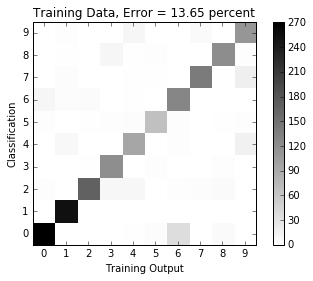

In [4]:
classifications = []

i = 0
while len(classifications) < rows:
    vector = train_in_vectors[i]
    distances_to_each_center = []
    
    #find distance to each cloud center
    for j in range(10):
        distances_to_each_center.append(distance(vector, centers[j]))

    #find minimum distance between vector and a cloud center
    for j in range(10):
        if abs(distances_to_each_center[j] - min(distances_to_each_center)) < 1e-4:
            classifications.append(j)
    
    i += 1

c = np.zeros([10,10])
for k in range(rows):
    i, j = actual_numbers[k], classifications[k]
    c[i,j] += 1

got_it_right = 0
for j in range(10):
    got_it_right += c[j,j] 
    
perc_error = str(round(int(rows - got_it_right)/float(rows)*100, 2))
    
ticks = [0,1,2,3,4,5,6,7,8,9]

plt.figure()
plt.title('Training Data, Error = %s percent'%perc_error)
plt.xlabel('Training Output')
plt.ylabel('Classification')
plt.xticks(ticks)
plt.yticks(ticks)
plt.imshow(c, origin = 'lower', interpolation='nearest', aspect = 'equal', cmap='binary')
plt.colorbar()
    
plt.savefig('Task2Training.jpg')

<b>Task 2, Testing Data</b>

percent error: 19.6 %


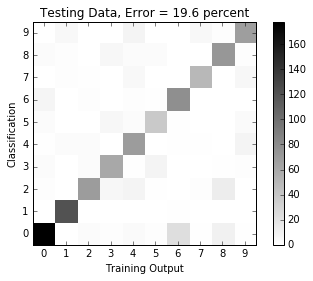

In [5]:
classifications = []

rows, columns = test_in.shape
test_in_vectors = [test_in[i,:] for i in range(rows)]
actual_numbers = [int(test_out[i]) for i in range(rows)]

i = 0
while len(classifications) < rows:
    vector = test_in_vectors[i]
    distances_to_each_center = []
    
    #find distance to each cloud center
    for j in range(10):
        distances_to_each_center.append(distance(vector, centers[j]))

    #find minimum distance between vector and a cloud center
    for j in range(10):
        if abs(distances_to_each_center[j] - min(distances_to_each_center)) < 1e-4:
            classifications.append(j)
    
    i += 1

c = np.zeros([10,10])
for k in range(rows):
    i, j = actual_numbers[k], classifications[k]
    c[i,j] += 1

got_it_right = 0
for j in range(10):
    got_it_right += c[j,j] 
    
perc_error = str(round(int(rows - got_it_right)/float(rows)*100, 2))
    
ticks = [0,1,2,3,4,5,6,7,8,9]

plt.figure()
plt.title('Testing Data, Error = %s percent'%perc_error)
plt.xlabel('Training Output')
plt.ylabel('Classification')
plt.xticks(ticks)
plt.yticks(ticks)
plt.imshow(c, origin = 'lower', interpolation='nearest', aspect = 'equal', cmap='binary')
plt.colorbar()
    
print 'percent error:', round(int(rows - got_it_right)/float(rows)*100, 2), '%'
plt.savefig('Task2Testing.jpg')